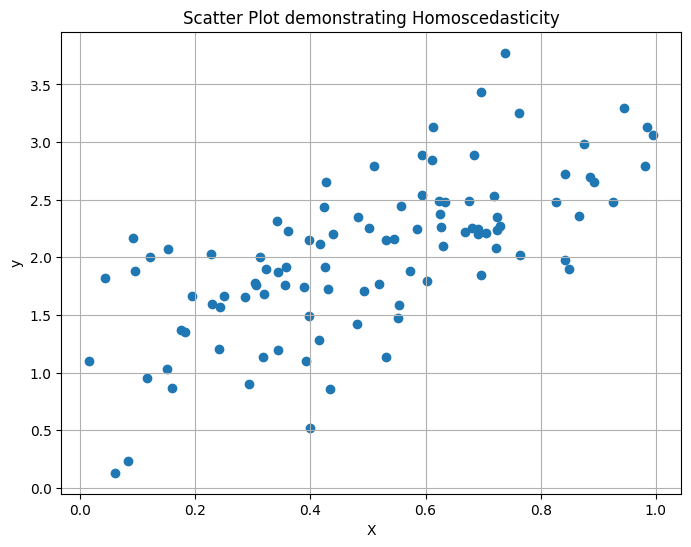

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
X = np.random.rand(100)
epsilon = np.random.randn(100) * 0.5
y = 1 + 2*X + epsilon


plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot demonstrating Homoscedasticity')
plt.grid(True)
plt.show()


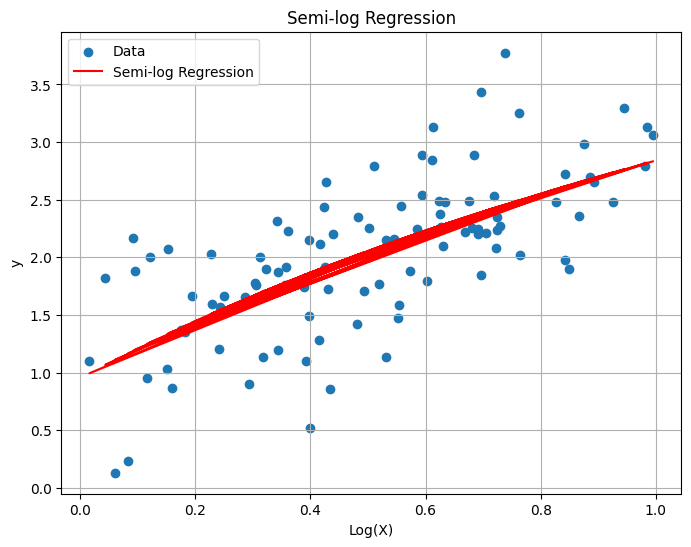

In [13]:
np.random.seed(123)
X = np.random.rand(100, 1)
y = 1 + 2*X[:,0] + np.random.randn(100)*0.5

X_semi_log = X.copy()
X_semi_log[:,0] = np.log(X_semi_log[:,0] + 1)

X_semi_log_with_const = sm.add_constant(X_semi_log)
model_semi_log = sm.OLS(y, X_semi_log_with_const).fit()

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], y, label='Data')
plt.plot(X[:,0], model_semi_log.predict(X_semi_log_with_const), color='red', label='Semi-log Regression')
plt.xlabel('Log(X)')
plt.ylabel('y')
plt.title('Semi-log Regression')
plt.legend()
plt.grid(True)
plt.show()


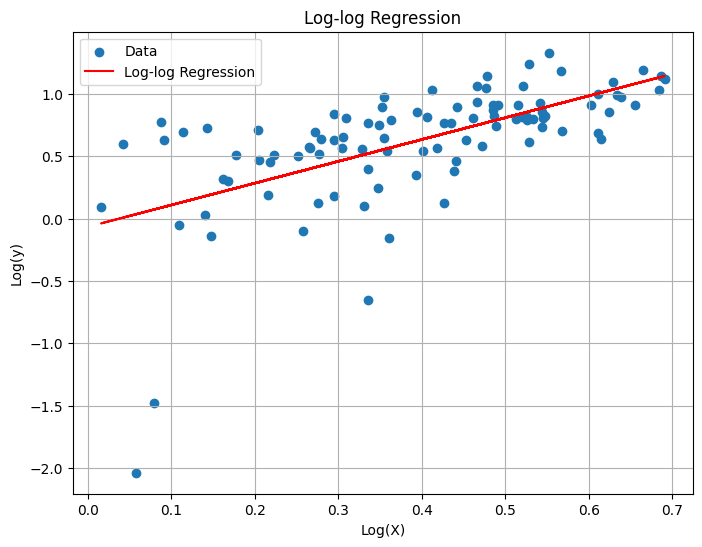

In [14]:
np.random.seed(123)
X = np.random.rand(100, 1)
y = 1 + 2*X[:,0] + np.random.randn(100)*0.5

X_log_log = np.log(X + 1)
y_log = np.log(y)


X_log_log_with_const = sm.add_constant(X_log_log)
model_log_log = sm.OLS(y_log, X_log_log_with_const).fit()


plt.figure(figsize=(8, 6))
plt.scatter(X_log_log[:,0], y_log, label='Data')
plt.plot(X_log_log[:,0], model_log_log.predict(X_log_log_with_const), color='red', label='Log-log Regression')
plt.xlabel('Log(X)')
plt.ylabel('Log(y)')
plt.title('Log-log Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

In [ ]:
products = ['A','B','C','D']
products

['A', 'B', 'C', 'D']

In [ ]:
type(products)

list

In [ ]:
product_categories = pd.Series(products)

In [ ]:
product_categories

0    A
1    B
2    C
3    D
dtype: object

In [ ]:
type(product_categories)

pandas.core.series.Series

In [ ]:
daily_rates_dollars = pd.Series([40, 45, 50, 60])
daily_rates_dollars

0    40
1    45
2    50
3    60
dtype: int64

In [ ]:
type(daily_rates_dollars)

pandas.core.series.Series

In [ ]:
import numpy as np

In [ ]:
array_a = np.array([10, 20, 30, 40, 50])

In [ ]:
array_a

array([10, 20, 30, 40, 50])

In [ ]:
series_a = pd.Series(array_a)

In [ ]:
series_a

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [ ]:
import pandas as pd
employee_names = ['Amy White', 'Jack Stewart', 'Richard Lauderdale', 'Sara Johnson']
employee_names_Series = pd.Series(employee_names)
print(employee_names_Series)

0             Amy White
1          Jack Stewart
2    Richard Lauderdale
3          Sara Johnson
dtype: object


In [ ]:
nums = [1, 35, 12, 24, 31, 51, 70, 100]

num = 0
for i in nums:
  if i < 20:
    num += 1

print(num)

2


In [1]:
nums = [1, 35, 12, 24, 31, 51, 70, 100]

count = 0
index = 0

while index < len(nums):
    if nums[index] < 20:
        count += 1
    index += 1

print(count)


2


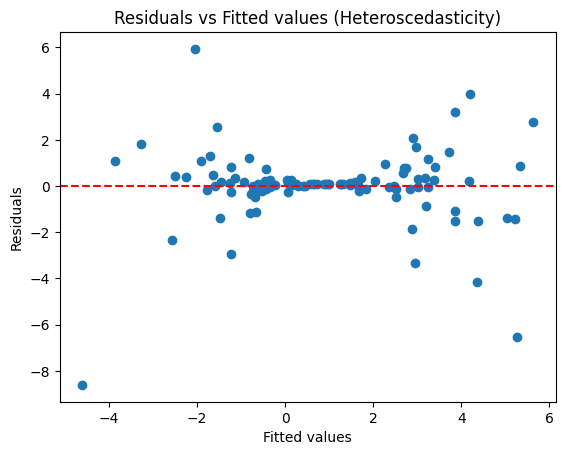

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulate data with heteroscedasticity
np.random.seed(123)
X = np.random.normal(0, 1, 100)  # Independent variable
epsilon = np.random.normal(0, X**2, 100)  # Heteroscedastic error term
y = 1 + 2*X + epsilon  # True relationship with heteroscedastic error

# Fit a linear regression model
X_with_const = sm.add_constant(X)  # Add constant for intercept
model = sm.OLS(y, X_with_const).fit()

# Predict values
y_pred = model.predict(X_with_const)

# Plot residuals against fitted values
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values (Heteroscedasticity)')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.show()


In [4]:
import numpy as np
import statsmodels.api as sm

# Generate some sample data
np.random.seed(123)
X = np.random.rand(100, 1)  # Independent variable
y = 1 + 2*X[:,0] + np.random.randn(100)*0.5  # True relationship with noise

# Fit linear regression model
X_with_const = sm.add_constant(X)  # Add constant for intercept
model = sm.OLS(y, X_with_const).fit()

# Print model summary
print("Simple Linear Regression Model Summary:")
print(model.summary())


Simple Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     85.81
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           4.80e-15
Time:                        02:47:01   Log-Likelihood:                -70.390
No. Observations:                 100   AIC:                             144.8
Df Residuals:                      98   BIC:                             150.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

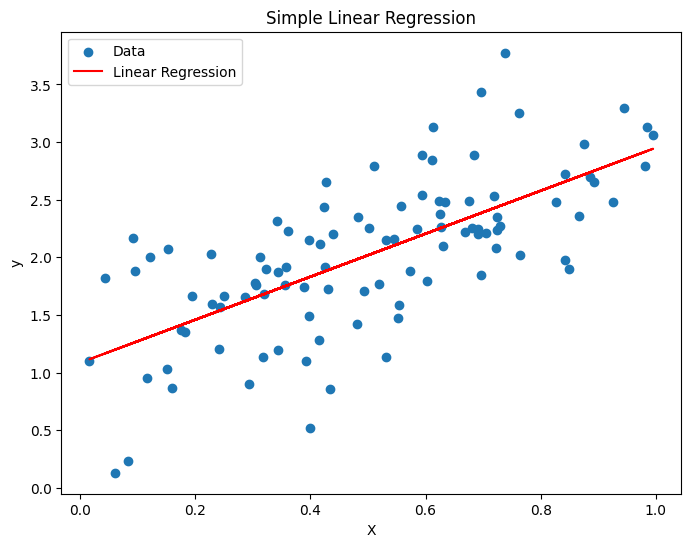

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, model.predict(X_with_const), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [6]:
# Semi-log model: log-linear regression
X_semi_log = X.copy()
X_semi_log[:,0] = np.log(X_semi_log[:,0] + 1)  # Taking log of the independent variable (adding 1 to avoid log(0))

# Fit semi-log model
X_semi_log_with_const = sm.add_constant(X_semi_log)
model_semi_log = sm.OLS(y, X_semi_log_with_const).fit()

# Print model summary
print("\nSemi-log Regression Model Summary:")
print(model_semi_log.summary())



Semi-log Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     84.23
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           7.37e-15
Time:                        02:47:21   Log-Likelihood:                -70.822
No. Observations:                 100   AIC:                             145.6
Df Residuals:                      98   BIC:                             150.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

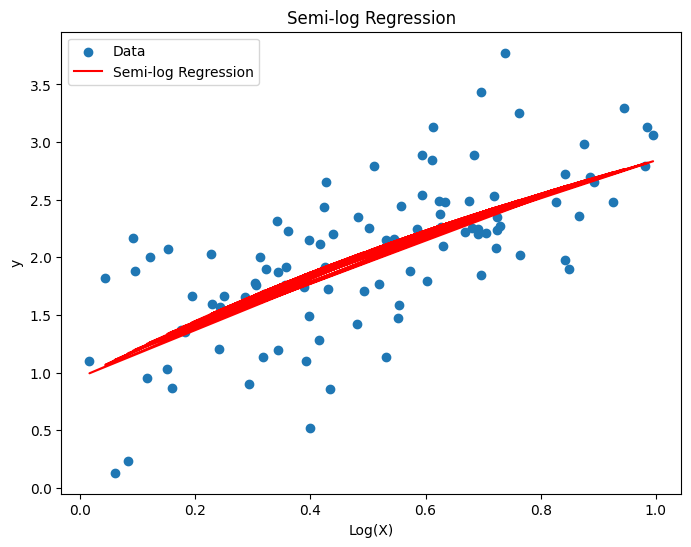

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, model_semi_log.predict(X_semi_log_with_const), color='red', label='Semi-log Regression')
plt.xlabel('Log(X)')
plt.ylabel('y')
plt.title('Semi-log Regression')
plt.legend()
plt.show()

In [7]:
# Log-log model: log-log regression
X_log_log = np.log(X + 1)  # Taking log of the independent variable (adding 1 to avoid log(0))

# Fit log-log model
X_log_log_with_const = sm.add_constant(X_log_log)
model_log_log = sm.OLS(y, X_log_log_with_const).fit()

# Print model summary
print("\nLog-log Regression Model Summary:")
print(model_log_log.summary())



Log-log Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     84.23
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           7.37e-15
Time:                        02:47:23   Log-Likelihood:                -70.822
No. Observations:                 100   AIC:                             145.6
Df Residuals:                      98   BIC:                             150.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.

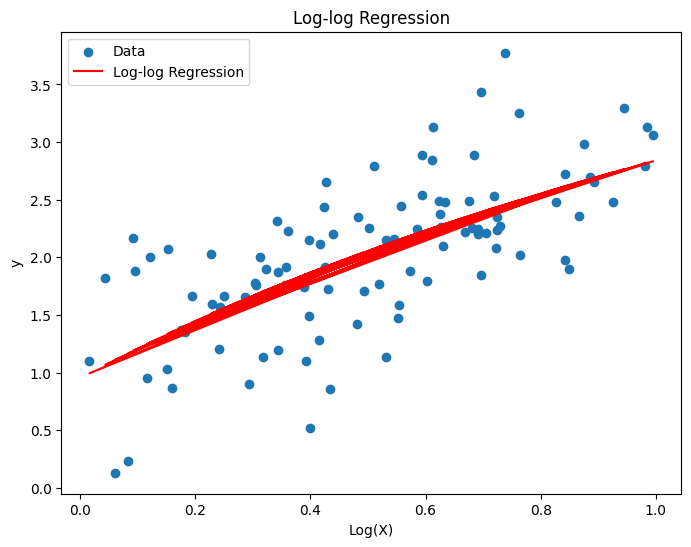

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, model_log_log.predict(X_log_log_with_const), color='red', label='Log-log Regression')
plt.xlabel('Log(X)')
plt.ylabel('y')
plt.title('Log-log Regression')
plt.legend()
plt.show()